In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
df =pd.read_csv("Customer Churn.csv")

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [32]:

df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

# replacing blancks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df.isnull().sum()

In [36]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [10]:
df.duplicated().sum()

0

In [11]:
df['customerID'].duplicated().sum()

0

In [12]:

df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: "yes" if x == 1 else "no")


# converted 0 and 1 value of senior citizen to yes/no to make it easier to understand

In [14]:
df.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            no     Yes         No       1           No   
1  5575-GNVDE    Male            no      No         No      34          Yes   
2  3668-QPYBK    Male            no      No         No       2          Yes   
3  7795-CFOCW    Male            no      No         No      45           No   
4  9237-HQITU  Female            no      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

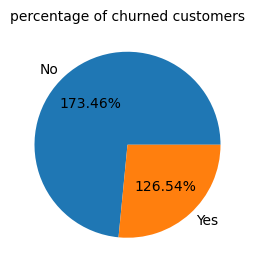

In [16]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb ['Churn'], labels = gb.index, autopct = '1%.2f%%')
plt.title("percentage of churned customers", fontsize =10)
plt.show()

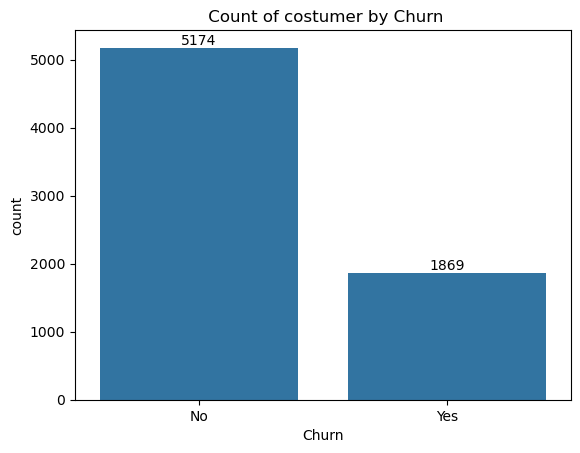

In [15]:
ax = sns.countplot(x = 'Churn',data =df)
ax.bar_label(ax.containers[0])
plt.title(" Count of costumer by Churn")
plt.show()

# from the given pie chart we can conclude that 126.54% of our costumer have churned out not let's explore the reson behid it

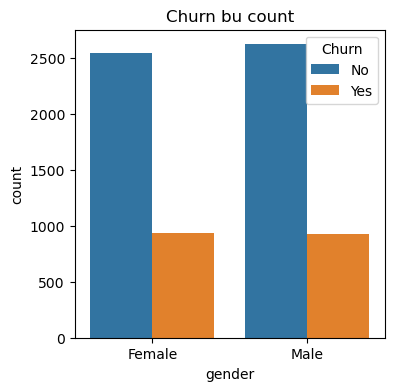

In [61]:
plt.figure(figsize =(4,4))

sns.countplot(x = df['gender'], data =df ,hue ='Churn')
plt.title('Churn bu count')
plt.show()

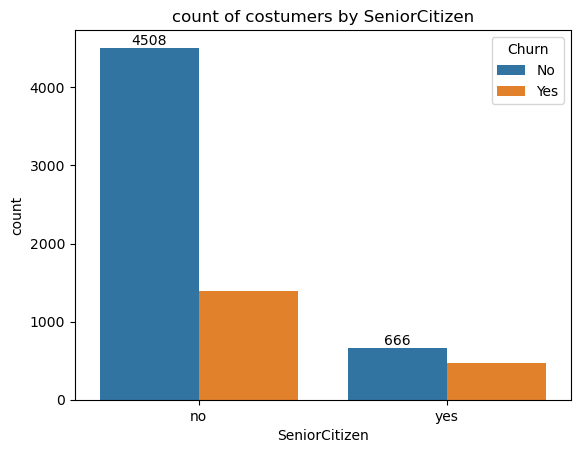

In [86]:
ax=sns.countplot(x= df['SeniorCitizen'], data =df, hue ='Churn')
ax.bar_label(ax.containers[0])
plt.title('count of costumers by SeniorCitizen')
plt.show()

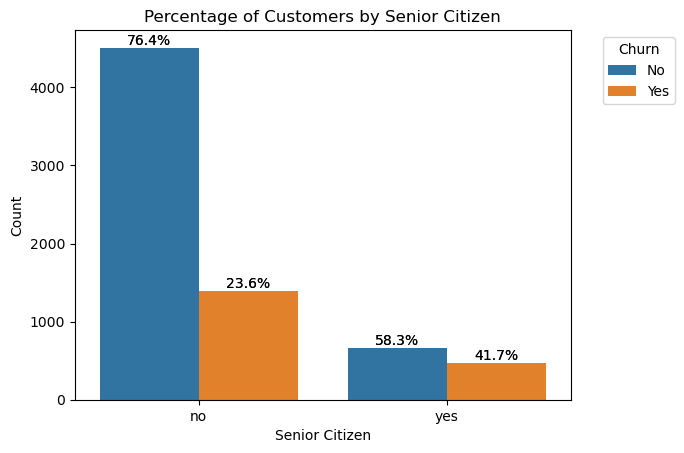

In [90]:
ax = sns.countplot(x='SeniorCitizen', data=df, hue='Churn')

# Calculate the percentages
total_counts = df.groupby(['SeniorCitizen'])['Churn'].value_counts(normalize=True).unstack() * 100

# Annotate bars with percentages
for container, hue_value in zip(ax.containers, total_counts.columns):
    for bar, percent in zip(container, total_counts[hue_value]):
        ax.bar_label(container, labels=[f'{percent:.1f}%' for percent in total_counts[hue_value]])

# Plot formatting
plt.title('Percentage of Customers by Senior Citizen')
plt.ylabel('Count')
plt.xlabel('Senior Citizen')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# comparative a greted percentage of pepole in senior citizen category have churned

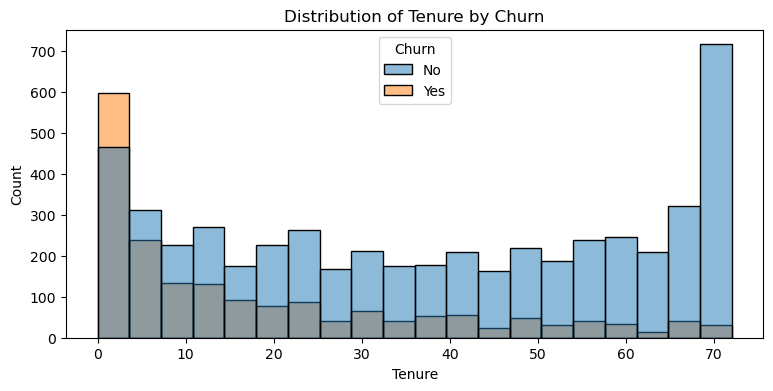

In [126]:
plt.figure(figsize=(9, 4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=False, bins=20)
plt.title('Distribution of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()



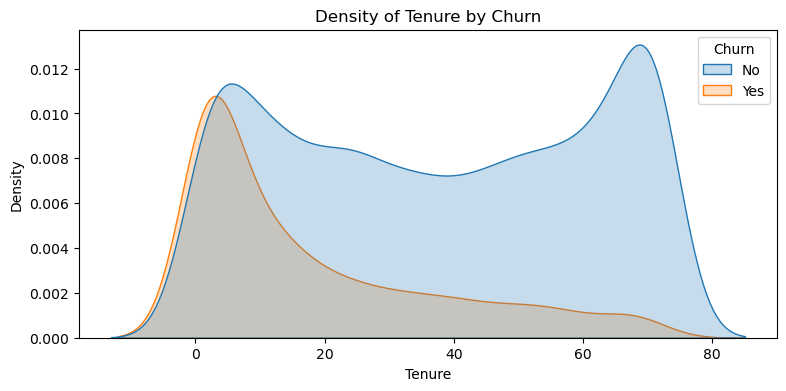

In [128]:
plt.figure(figsize=(9, 4))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title('Density of Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.show()


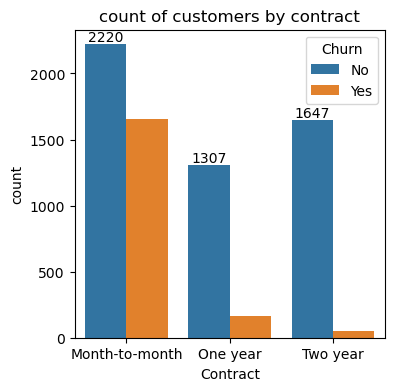

In [142]:
plt.figure(figsize =(4,4))
ax = sns.countplot(x ='Contract', data =df, hue ='Churn')
ax.bar_label(ax.containers[0])
plt.title('count of customers by contract')
plt.show()

# pepole  who have month to month cotract are likely to churn then from those who have 1 or 2 years or contracts

In [158]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

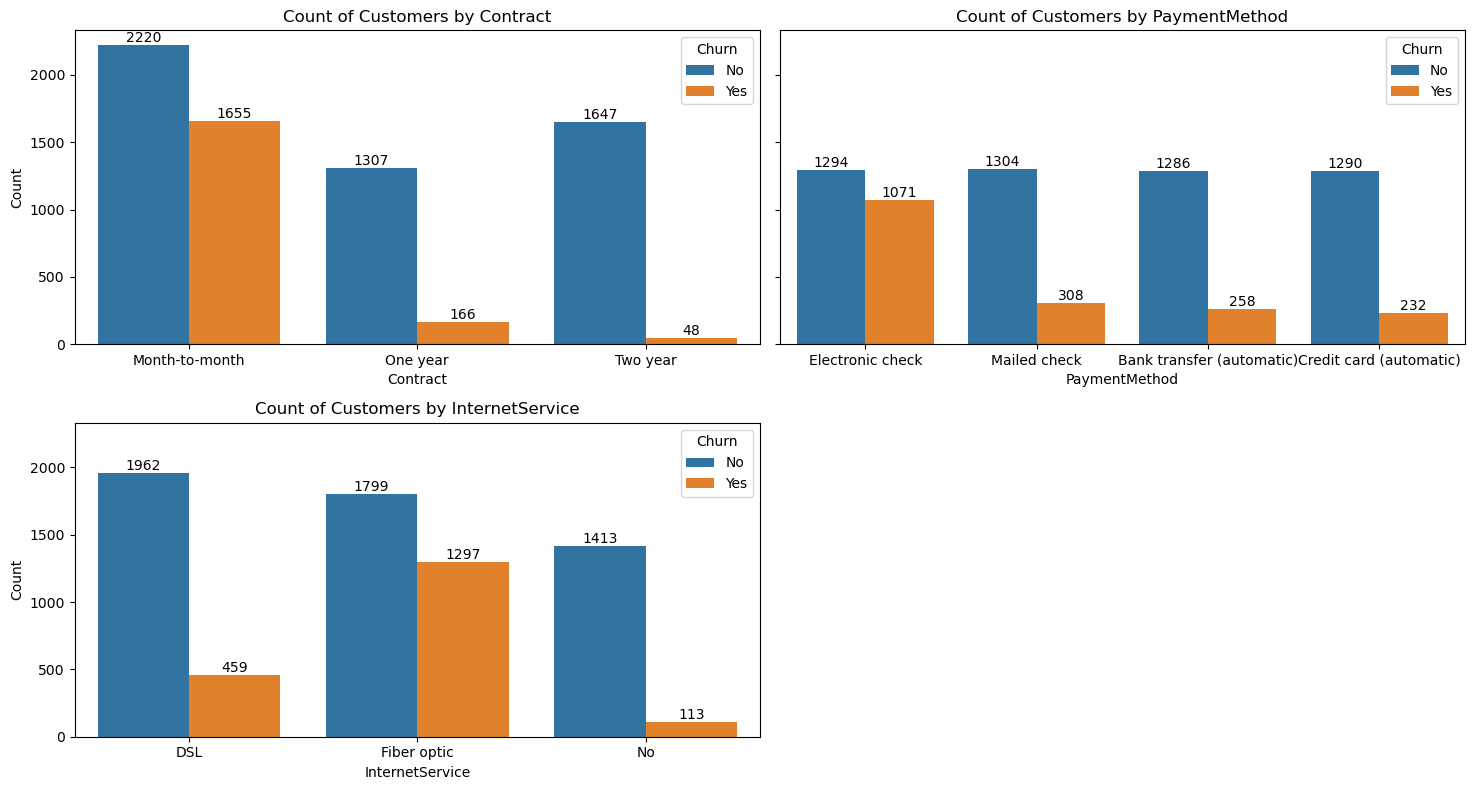

In [170]:

# Define the columns to plot
columns_to_plot = ['Contract', 'PaymentMethod', 'InternetService']

# Create a figure with subplots
num_plots = len(columns_to_plot)
rows, cols = (1 + num_plots // 3, 2)  # Adjust grid layout (3 plots per row)
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

# Flatten axes for easier iteration if necessary
axes = axes.flatten()

# Generate count plots for each column
for i, column in enumerate(columns_to_plot):
    ax = sns.countplot(ax=axes[i], x=column, data=df, hue='Churn')
    for container in ax.containers:
        ax.bar_label(container)  # Add bar labels
    ax.set_title(f'Count of Customers by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')

# Hide any unused subplots if the number of columns is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Month-to-month contracts have the highest churn compared to one- and two-year contracts.
# Customers using Electronic Check as a payment method churn more frequently than those using automatic payments.
# Fiber optic internet service has a significantly higher churn rate than DSL or no internet service.

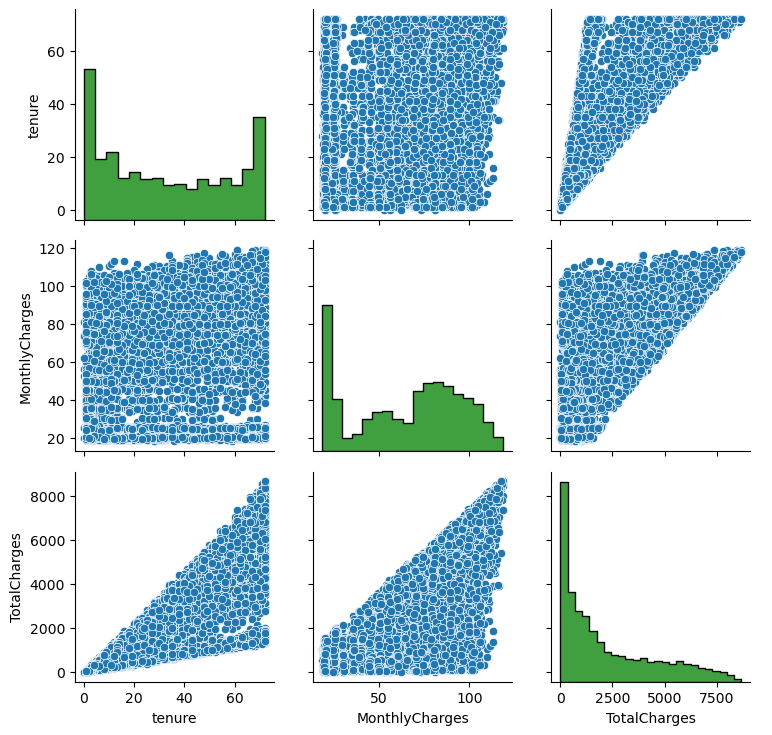

In [177]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot, multiple="stack", element="step",color='green')
g.map_offdiag(sns.scatterplot)
g.add_legend()

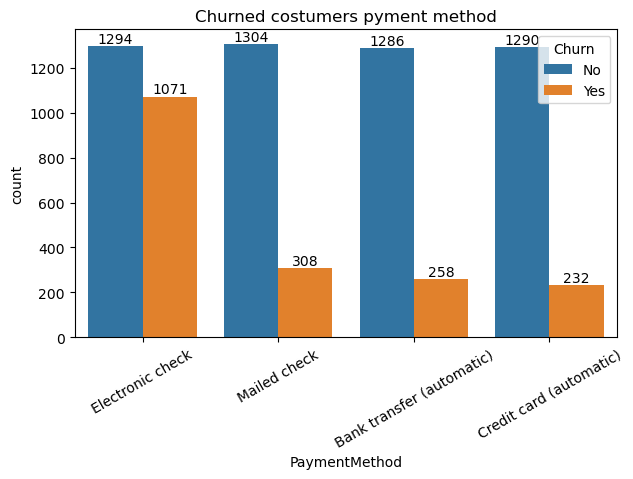

In [208]:
plt.figure(figsize =(7,4))
ax = sns.countplot(x ='PaymentMethod', data =df, hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation =30)
plt.title('Churned costumers pyment method')
plt.show()

# custumers is likely to churn when he is using electronic as a payment method